# Medical Expenditure Panel Survey

This is explanatory analysis of medical expenses related to medical treatments.
This is a regression problem.

In this work I trained and compared 4 models:
    - Gradient Boosting Regressor
    - Linear Regression
    - Ridge Regression
    - Random Forest Regressor
  
Data preprocessing was done and categorical variables were One Hot Encoded. 
Health Expenses were also limited to maximum of 150k$.
    

# 2. Calculate permutational variable importance for the selected model

## 2.1 Gradient Boosting Regressor 

model:Gradient Boosting Regressor


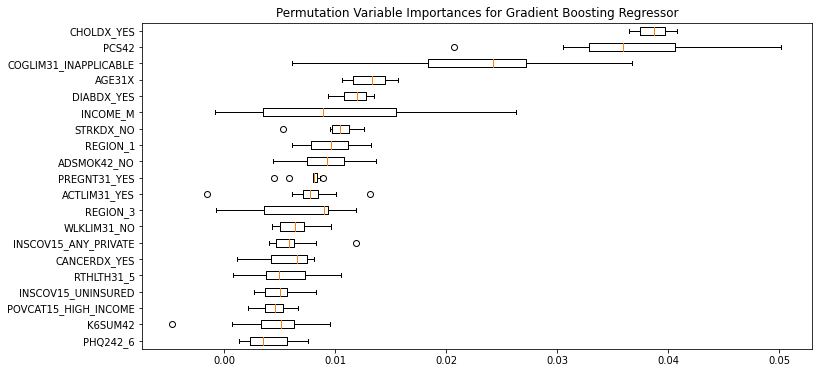

In [80]:
show_permutation_importance('Gradient Boosting Regressor', gbr, X_test, y_test, n_repeats=10, max_index=20)

For Gradient Boosting Regressor, computed variable importance with highest value are __CHOLDX_YES__ (HIGH CHOLESTEROL DIAGNOSIS = Yes), __PCS42__ (PHY COMPONENT SUMMRY SF-12V2 IMPUTED), __AGE31X__ (AGE - R3/1 (EDITED/IMPUTED)), __DIABDX_YES__ (DIABETES DIAGNOSIS = Yes) and __INCOME_M__. Three variables with importance > 0.02 are __CHOLDX_YES__, __PCS42__, __AGE31X__. Also income and diabetes flag=True are listed as important features.

## 2.2 Linear Regression

model:Linear Regression


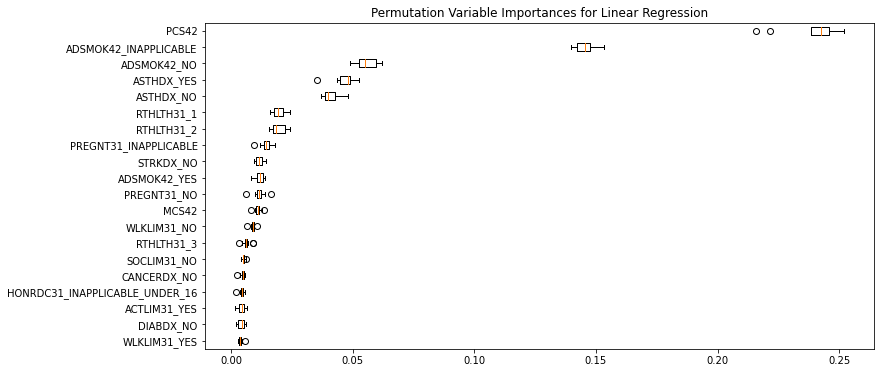

In [81]:
show_permutation_importance('Linear Regression', slr, X_test, y_test, n_repeats=10, max_index=20)

In case of a linear regression, features __PCS42__ (PHY COMPONENT SUMMRY SF-12V2 IMPUTED), __ADSMOK42__ = (NO or INAPPLICABLE)(CURRENTLY SMOKE) and __ASTHDX__ = (YES / NO)(ASTHMA DIAGNOSIS) had the highest variable importance value, where __PCS42__, __ADSMOK42__ seemed to be the most important with values > 0.15. For Gradient Boosting Regressor __PCS42__ also had high importance.

## 2.3 Ridge Regression

model:Ridge Regression 


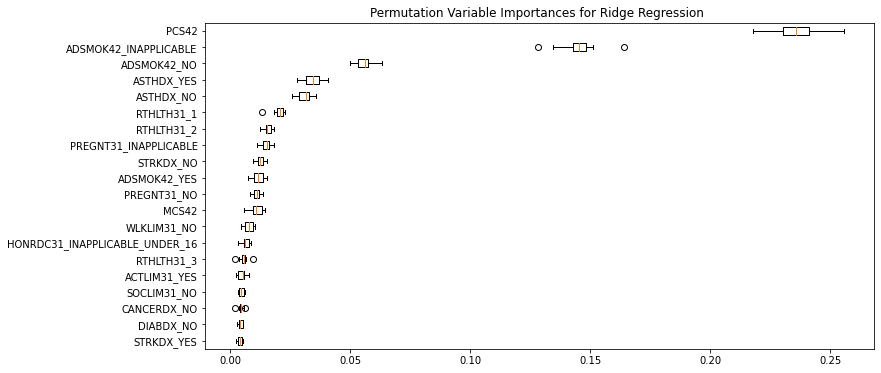

In [82]:
show_permutation_importance('Ridge Regression ', ridge, X_test, y_test, n_repeats=10, max_index=20)a

In case of a ridge regression, features __PCS42__, __ADSMOK42__ = (NO or INAPPLICABLE) and __ASTHDX__ = (YES / NO) had the highest variable importance value, where __PCS42__, __ADSMOK42__ seemed to be the most important with values > 0.15. For Gradient Boosting Regressor __PCS42__ also had high importance. Ridge regression has the same importances as linear regression.

## 2.4 Random Forest Regressor

model:Random Forest Regressor


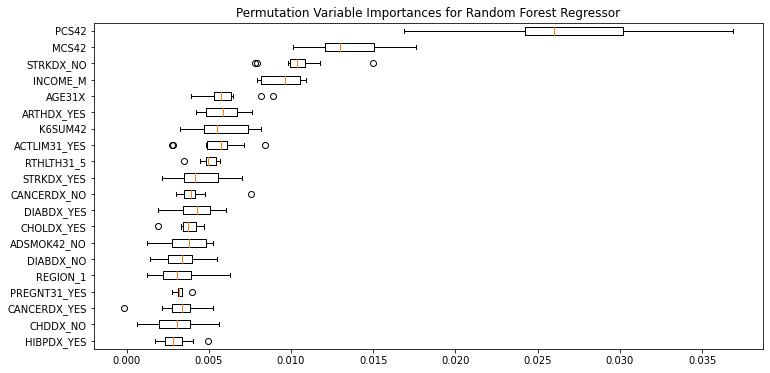

In [83]:
show_permutation_importance('Random Forest Regressor', tree, X_test, y_test, n_repeats=10, max_index=20)

In case of a random forest regressor, features __PCS42__ (SAQ:PHY COMPONENT SUMMRY SF-12V2 IMPUTED), __MCS42__ (SAQ:MNT COMPONENT SUMMRY SF-12V2 IMPUTED), __STRKDX__ = NO (STROKE DIAGNOSIS) and __INCOME_M__ had the highest variable importance value, where __PCS42__, seemed to be the most important with values > 0.025. For Gradient Boosting Regressor __PCS42__ also had high importance.

## 2.5 Conclusions 

Gradient Boosting and Random Forest Regressors had similar most important variables: __PCS42__, __INCOME_M__, __AGE31X__ and __STRDX_NO__. Where Ridge and Linear Regression models had identical most important variables, but different from Gradient Boosting and RF Regressors, apart from one variable __PCS42__, which was one of the most important in all models.

In Linear and Ridge Regression models there are 2-3 most important variables with value greater than 0.1, when for Random Forest and Gradient Boosting Regressor all variables have value below 0.05.

# Appendix

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from aix360.datasets import MEPSDataset


pd.options.display.max_columns = 150

In [5]:
data = MEPSDataset().data()

In [5]:
data.reset_index(drop=True, inplace=True)

In [6]:
data.drop(columns= ['PANEL', 'PERSONWT'], inplace=True)

In [7]:
data_filtered = data[data['HEALTHEXP'] < 150000]

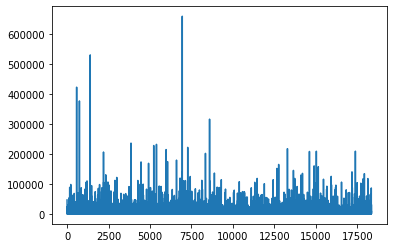

In [8]:
plt.plot(data.HEALTHEXP)


In [9]:
data.head()

,REGION,AGE31X,GENDER,RACE3,MARRY31X,EDRECODE,FTSTU31X,ACTDTY31,HONRDC31,RTHLTH31,MNHLTH31,HIBPDX,CHDDX,ANGIDX,MIDX,OHRTDX,STRKDX,EMPHDX,CHBRON31,CHOLDX,CANCERDX,DIABDX,JTPAIN31,ARTHDX,ARTHTYPE,ASTHDX,ADHDADDX,PREGNT31,WLKLIM31,ACTLIM31,SOCLIM31,COGLIM31,DFHEAR42,DFSEE42,ADSMOK42,PCS42,MCS42,K6SUM42,PHQ242,EMPST31,POVCAT15,INSCOV15,INCOME_M,HEALTHEXP
0,2,52,0.0,0.0,5,13,-1,2,2,4,1,1,1,1,1,1,2,1,2,1,2,1,1,1,3,2,-1,-1,1,1,2,2,2,2,2,25.93,58.47,3,0,4,1,2,11390.0,46612
1,2,55,1.0,0.0,3,14,-1,2,2,4,1,1,2,2,2,2,2,2,2,1,2,1,2,1,3,1,-1,-1,1,1,2,2,2,2,2,20.42,26.57,17,6,4,3,2,11390.0,9207
2,2,22,1.0,0.0,5,13,3,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,-1,2,-1,2,2,2,2,2,2,2,2,53.12,50.33,7,0,1,2,2,18000.0,808
3,2,2,0.0,0.0,6,-1,-1,3,3,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,-1,-1,2,-1,2,-1,2,2,-1,-1.00,-1.00,-1,-1,-1,2,2,385.0,2721
4,3,25,1.0,0.0,1,14,-1,2,2,1,3,2,2,2,2,2,2,2,2,2,2,2,1,2,-1,2,-1,1,2,2,2,2,2,2,2,59.89,45.91,9,2,1,3,1,3700.0,1573


In [10]:
def score_r2_print(clf, X_train, X_test, y_train, y_test):
    print('Training R^2:', r2_score(y_train, clf.predict(X_train)))
    print('Test R^2:', r2_score(y_test, clf.predict(X_test)))

# Data preprocessing

In [11]:
cols = data.columns

In [12]:
categoricalCols = [
    'REGION','GENDER', 'RACE3', 'MARRY31X','EDRECODE','FTSTU31X','ACTDTY31','HONRDC31',
    'RTHLTH31','MNHLTH31','HIBPDX','CHDDX','ANGIDX','MIDX','OHRTDX','STRKDX','EMPHDX',
    'CHBRON31','CHOLDX','CANCERDX','DIABDX','JTPAIN31','ARTHDX', 'ARTHTYPE','ASTHDX',
    'ADHDADDX','PREGNT31','WLKLIM31','ACTLIM31','SOCLIM31','COGLIM31','DFHEAR42',
    'DFSEE42','ADSMOK42','PHQ242','EMPST31','POVCAT15','INSCOV15'
]

In [13]:
X, y = data.drop({'HEALTHEXP'}, 1), data['HEALTHEXP']

In [14]:
X_cat = X.copy()
for cat in categoricalCols:
    X_cat[cat] = X_cat[cat].astype('category')

In [15]:
X_copied = X.copy()
X_copied['REGION'] = X_copied['REGION'].map({i: 'REGION_' + str(i) for i in range(1, 5)})
X_copied['MARRY31X'] = X_copied['MARRY31X'].map({i: 'MARRY31X_' + str(i) for i in range(1, 11)})
X_copied['GENDER'] = X_copied['GENDER'].map({0: 'MALE', 1: 'FEMALE'})
X_copied['RACE3'] = X_copied['RACE3'].map({0: 'RACE_0', 1: 'RACE_1'})
X_copied['EDRECODE'] = X_copied['EDRECODE'].map({-1: "EDRECODE_INAPPLICABLE", 1: 'EDRECODE_LSEQ_8TH_GRADE', 2: 'EDRECODE_9-12TH_GRAD', 13: 'EDRECODE_GED_OR_GRAD', 14:'EDRECODE_BEYOND_HS_OR_COLLEGE', 15: 'EDRECODE_BACHELOR', 16: 'EDRECODE_HIGHER_DEGREE'})
X_copied['FTSTU31X'] = X_copied['FTSTU31X'].map({-1: 'FTSTU31X_INAPPLICABLE', 1: 'FTSTU31X_FULLTIME', 2: 'FTSTU31X_PARTTIME', 3: 'FTSTU31X_NOT_A_STUDENT'})
X_copied['ACTDTY31'] = X_copied['ACTDTY31'].map({-1: 'ACTDTY31_INAPPLICABLE', 1: 'ACTDTY31_YES', 2 : "ACTDTY31_NO", 3: 'ACTDTY31_INAPPLICABLE_UNDER_16', 4: 'ACTDTY31_INAPPLICABLE_OVER_59'})
X_copied['HONRDC31'] = X_copied['HONRDC31'].map({-1: 'HONRDC31_INAPPLICABLE', 1: 'HONRDC31_YES', 2 : "HONRDC31_NO", 3: 'HONRDC31_INAPPLICABLE_UNDER_16', 4: 'HONRDC31_ACTIVE_DUTY'})
X_copied['ARTHTYPE'] = X_copied['ARTHTYPE'].map({-1: 'ARTHTYPE_INAPPLICABLE', 1: 'ARTHTYPE_RHEUMATOID_ARTHRITIS', 2 : "ARTHTYPE_OSTEOARTHRITIS", 3: 'ARTHTYPE_NOT_SPECIFIED'})
X_copied['POVCAT15'] = X_copied['POVCAT15'].map({ 1: 'POVCAT15_POOR_OR_NEGATIVE', 2 : "POVCAT15_NEAR_POOR", 3: 'POVCAT15_LOW_INCOME', 4: 'POVCAT15_MIDDLE_INCOME', 5: 'POVCAT15_HIGH_INCOME'})
X_copied['INSCOV15'] = X_copied['INSCOV15'].map({1: 'INSCOV15_ANY_PRIVATE', 2: 'INSCOV15_PUBLIC_ONLY', 3: 'INSCOV15_UNINSURED'})


for cat in ['RTHLTH31', 'MNHLTH31', 'PHQ242', 'EMPST31']:
    X_copied[cat] = X_copied[cat].map({i: cat + '_' + str(i) for i in range(1, 7)})
    

for cat in ['HIBPDX', 'CHDDX', 'ANGIDX', 'MIDX', 'OHRTDX', 'STRKDX', 'EMPHDX',
            'CHBRON31', 'CHOLDX', 'CANCERDX', 'DIABDX', 'JTPAIN31', 'ARTHDX',
            'ASTHDX', 'ADHDADDX', 'PREGNT31', 'WLKLIM31', 'ACTLIM31',
            'SOCLIM31', 'COGLIM31', 'DFHEAR42', 'DFSEE42', 'ADSMOK42']:
    X_copied[cat] = X_copied[cat].map({-1: cat + "_INAPPLICABLE", 1: cat + "_YES", 2 : cat + "_NO"})

X_copied = pd.get_dummies(X_copied, prefix='', prefix_sep='')

In [16]:
X_copied.head()

,AGE31X,PCS42,MCS42,K6SUM42,INCOME_M,REGION_1,REGION_2,REGION_3,REGION_4,FEMALE,MALE,RACE_0,RACE_1,MARRY31X_1,MARRY31X_10,MARRY31X_2,MARRY31X_3,MARRY31X_4,MARRY31X_5,MARRY31X_6,MARRY31X_7,MARRY31X_8,MARRY31X_9,EDRECODE_9-12TH_GRAD,EDRECODE_BACHELOR,EDRECODE_BEYOND_HS_OR_COLLEGE,EDRECODE_GED_OR_GRAD,EDRECODE_HIGHER_DEGREE,EDRECODE_INAPPLICABLE,EDRECODE_LSEQ_8TH_GRADE,FTSTU31X_FULLTIME,FTSTU31X_INAPPLICABLE,FTSTU31X_NOT_A_STUDENT,FTSTU31X_PARTTIME,ACTDTY31_INAPPLICABLE_OVER_59,ACTDTY31_INAPPLICABLE_UNDER_16,ACTDTY31_NO,ACTDTY31_YES,HONRDC31_ACTIVE_DUTY,HONRDC31_INAPPLICABLE_UNDER_16,HONRDC31_NO,HONRDC31_YES,RTHLTH31_1,RTHLTH31_2,RTHLTH31_3,RTHLTH31_4,RTHLTH31_5,MNHLTH31_1,MNHLTH31_2,MNHLTH31_3,MNHLTH31_4,MNHLTH31_5,HIBPDX_INAPPLICABLE,HIBPDX_NO,HIBPDX_YES,CHDDX_INAPPLICABLE,CHDDX_NO,CHDDX_YES,ANGIDX_INAPPLICABLE,ANGIDX_NO,ANGIDX_YES,MIDX_INAPPLICABLE,MIDX_NO,MIDX_YES,OHRTDX_INAPPLICABLE,OHRTDX_NO,OHRTDX_YES,STRKDX_INAPPLICABLE,STRKDX_NO,STRKDX_YES,EMPHDX_INAPPLICABLE,EMPHDX_NO,EMPHDX_YES,CHBRON31_INAPPLICABLE,CHBRON31_NO,CHBRON31_YES,CHOLDX_INAPPLICABLE,CHOLDX_NO,CHOLDX_YES,CANCERDX_INAPPLICABLE,CANCERDX_NO,CANCERDX_YES,DIABDX_INAPPLICABLE,DIABDX_NO,DIABDX_YES,JTPAIN31_INAPPLICABLE,JTPAIN31_NO,JTPAIN31_YES,ARTHDX_INAPPLICABLE,ARTHDX_NO,ARTHDX_YES,ARTHTYPE_INAPPLICABLE,ARTHTYPE_NOT_SPECIFIED,ARTHTYPE_OSTEOARTHRITIS,ARTHTYPE_RHEUMATOID_ARTHRITIS,ASTHDX_INAPPLICABLE,ASTHDX_NO,ASTHDX_YES,ADHDADDX_INAPPLICABLE,ADHDADDX_NO,ADHDADDX_YES,PREGNT31_INAPPLICABLE,PREGNT31_NO,PREGNT31_YES,WLKLIM31_INAPPLICABLE,WLKLIM31_NO,WLKLIM31_YES,ACTLIM31_INAPPLICABLE,ACTLIM31_NO,ACTLIM31_YES,SOCLIM31_INAPPLICABLE,SOCLIM31_NO,SOCLIM31_YES,COGLIM31_INAPPLICABLE,COGLIM31_NO,COGLIM31_YES,DFHEAR42_INAPPLICABLE,DFHEAR42_NO,DFHEAR42_YES,DFSEE42_INAPPLICABLE,DFSEE42_NO,DFSEE42_YES,ADSMOK42_INAPPLICABLE,ADSMOK42_NO,ADSMOK42_YES,PHQ242_1,PHQ242_2,PHQ242_3,PHQ242_4,PHQ242_5,PHQ242_6,EMPST31_1,EMPST31_2,EMPST31_3,EMPST31_4,POVCAT15_HIGH_INCOME,POVCAT15_LOW_INCOME,POVCAT15_MIDDLE_INCOME,POVCAT15_NEAR_POOR,POVCAT15_POOR_OR_NEGATIVE,INSCOV15_ANY_PRIVATE,INSCOV15_PUBLIC_ONLY,INSCOV15_UNINSURED
0,52,25.93,58.47,3,11390.0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,55,20.42,26.57,17,11390.0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
2,22,53.12,50.33,7,18000.0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,2,-1.00,-1.00,-1,385.0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,25,59.89,45.91,9,3700.0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_copied, y, test_size=0.2, random_state=37)

# 1 Training models


## 1.1. Linear Regression

In [18]:
slr = LinearRegression()

In [19]:
slr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
score_r2_print(slr, X_train, X_test, y_train, y_test)

Training R^2: 0.1620419881612405
Test R^2: 0.19447627445968552


In [21]:
y_test_pred = slr.predict(X_test)
y_train_pred = slr.predict(X_train)

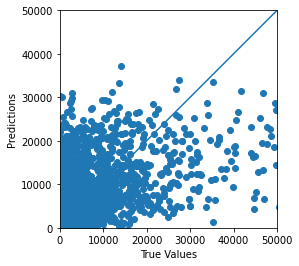

In [22]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_test_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## 1.2. Ridge Regression

In [23]:
from sklearn.linear_model import Ridge

In [24]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
score_r2_print(ridge, X_train, X_test, y_train, y_test)

Training R^2: 0.16203205749064264
Test R^2: 0.19462452203377223


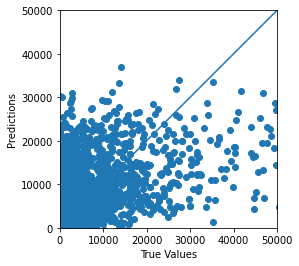

In [25]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, ridge.predict(X_test))
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## 1.3. RandomForestRegressor

In [26]:
from sklearn.ensemble import RandomForestRegressor

tree = RandomForestRegressor(
    n_estimators=900, 
    criterion='mse', 
    random_state=1,
    max_features="sqrt",
    n_jobs=-1)
tree.fit(X_train, y_train)
score_r2_print(tree, X_train, X_test, y_train, y_test)


Training R^2: 0.8803196010114231
Test R^2: 0.1839203388395424


## 1.4. GradientBoostingRegressor

In [27]:
gbr = GradientBoostingRegressor(n_estimators=200, random_state=7, max_features="log2")
gbr.fit(X_train, y_train)

score_r2_print(gbr, X_train, X_test, y_train, y_test)

Training R^2: 0.3157441703485997
Test R^2: 0.19576835082377042


In [28]:
y_pred_gbr = gbr.predict(X_test)

In [29]:
test_predictions = gbr.predict(X_test)

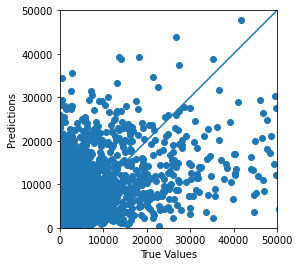

In [30]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [44]:
from sklearn.inspection import permutation_importance

In [76]:
def show_permutation_importance(model_name, model, x, y, **kwargs):
    
    print(f"model:{model_name}")
    max_index = len(x.columns)
    if 'max_index' in kwargs:
        max_index = kwargs.pop('max_index')
    
    result = permutation_importance(model, x, y, **kwargs)
    sorted_idx = result.importances_mean.argsort()[-max_index:]

    fig, ax = plt.subplots(figsize=(12,16))
    ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=x.columns[sorted_idx])
    ax.set_title(f"Permutation Variable Importances for {model_name}")
    plt.show()